# Boston & Seattle AirBnB Dataset Analysis

####  27th June 2019

## Import Libraries

In [71]:
import pandas as pd
from re import sub
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn import preprocessing 
import numpy.polynomial.polynomial as poly
from matplotlib import colors as mcolors


This project investigate the rental market in Boston and Seattle by using AirBnB dataset. The datasets for each city has three parts: 

1. Listings - Listings data showing 92 (Seattle) and 95 (Boston) attributes for each of the listings.

2. Reviews - Reviews given by the guests with 5attributes. Key attributes include date (datetime), listing_id (discrete), reviewer_id (discrete) and comment (textual).

3. Calendar - Booking data for the next year by listing. Four attributes in total including listing_id (discrete), date(datetime), available (categorical) and price (continuous).

## Datasets adopted for this project

1. Boston Airbnb Open Data, https://www.kaggle.com/airbnb/boston
2. Seattle Airbnb Open Data, https://www.kaggle.com/airbnb/seattle/data

### Data Loading

In [2]:
calendar_Boston = pd.read_csv("./data/calendar_Boston.csv",index_col='date', parse_dates=True)
calendar_Seattle = pd.read_csv("./data/calendar_Seattle.csv",index_col='date', parse_dates=True)
listings_Boston = pd.read_csv("./data/listings_Boston.csv")
listings_Seattle = pd.read_csv("./data/listings_Seattle.csv")
reviews_Boston = pd.read_csv("./data/reviews_Boston.csv",index_col='date', parse_dates=True)
reviews_Seattle = pd.read_csv("./data/reviews_Seattle.csv",index_col='date', parse_dates=True)

### Data Synopsis

In [3]:
calendar_Boston.head(5)

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN


In [4]:
listings_Boston.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [5]:
reviews_Boston.head()

,listing_id,id,reviewer_id,reviewer_name,comments
date,,,,,
2013-05-21,1178162,4724140,4298113,Olivier,My stay at islam's place was really cool! Good...
2013-05-29,1178162,4869189,6452964,Charlotte,Great location for both airport and city - gre...
2013-06-06,1178162,5003196,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
2013-06-15,1178162,5150351,2215611,Marine,The room was nice and clean and so were the co...
2013-06-16,1178162,5171140,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
calendar_Boston.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308890 entries, 2017-09-05 to 2016-09-06
Data columns (total 3 columns):
listing_id    1308890 non-null int64
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(2)
memory usage: 39.9+ MB


In [7]:
calendar_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1393570 entries, 2016-01-04 to 2017-01-02
Data columns (total 3 columns):
listing_id    1393570 non-null int64
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(2)
memory usage: 42.5+ MB


In [8]:
listings_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [9]:
listings_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [10]:
reviews_Boston.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68275 entries, 2013-05-21 to 2016-08-31
Data columns (total 5 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(2)
memory usage: 3.1+ MB


In [14]:
reviews_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84849 entries, 2015-07-19 to 2015-12-13
Data columns (total 5 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


## Data Preprocessing

### Missing values

In [15]:
print(listings_Seattle.shape)
listings_Seattle.isnull().sum()[listings_Seattle.isnull().sum()>0]

(3818, 92)


summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

In [16]:
print(listings_Boston.shape)
listings_Boston.isnull().sum()[listings_Boston.isnull().sum()>0]

(3585, 95)


summary                          143
space                           1057
neighborhood_overview           1415
notes                           1975
transit                         1290
access                          1489
interaction                     1554
house_rules                     1192
thumbnail_url                    599
medium_url                       599
xl_picture_url                   599
host_location                     11
host_about                      1309
host_response_time               471
host_response_rate               471
host_acceptance_rate             471
host_neighbourhood               339
neighbourhood                    543
neighbourhood_group_cleansed    3585
city                               2
zipcode                           38
market                            14
property_type                      3
bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
w

### Columns has more than 1000 missing values. 

In [11]:
listings_Seattle.isnull().sum()[listings_Seattle.isnull().sum()>1000].index

Index(['neighborhood_overview', 'notes', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'license'],
      dtype='object')

In [12]:
listings_Boston.isnull().sum()[listings_Boston.isnull().sum()>1000].index

Index(['space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'host_about',
       'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

In [13]:
listings_Seattle.iloc[0:10]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

After investigating the columns with most missing values, it is likely that these columns are unlikely to add value to the analysis. As such they are dropped.

In [14]:
listings_Boston = listings_Boston.drop(listings_Boston.isnull().sum()[listings_Boston.isnull().sum()>1000].index, axis=1)
listings_Seattle = listings_Seattle.drop(listings_Seattle.isnull().sum()[listings_Seattle.isnull().sum()>1000].index, axis=1)

These are remaining columns with missing values

In [15]:
listings_Boston.isnull().sum()[listings_Boston.isnull().sum()>0]

summary                        143
thumbnail_url                  599
medium_url                     599
xl_picture_url                 599
host_location                   11
host_response_time             471
host_response_rate             471
host_acceptance_rate           471
host_neighbourhood             339
neighbourhood                  543
city                             2
zipcode                         38
market                          14
property_type                    3
bathrooms                       14
bedrooms                        10
beds                             9
first_review                   756
last_review                    756
review_scores_rating           813
review_scores_accuracy         823
review_scores_cleanliness      818
review_scores_checkin          820
review_scores_communication    818
review_scores_location         822
review_scores_value            821
reviews_per_month              756
dtype: int64

In [16]:
listings_Seattle.isnull().sum()[listings_Seattle.isnull().sum()>0]

summary                        177
space                          569
transit                        934
thumbnail_url                  320
medium_url                     320
xl_picture_url                 320
host_name                        2
host_since                       2
host_location                    8
host_about                     859
host_response_time             523
host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
host_thumbnail_url               2
host_picture_url                 2
host_neighbourhood             300
host_listings_count              2
host_total_listings_count        2
host_has_profile_pic             2
host_identity_verified           2
neighbourhood                  416
zipcode                          7
property_type                    1
bathrooms                       16
bedrooms                         6
beds                             1
first_review                   627
last_review         

### Drop columns with unusuable url links

In [4]:
drop_url_columns = ['listing_url','thumbnail_url', 'medium_url','picture_url', 'xl_picture_url', 'host_id', 'host_url','host_thumbnail_url', 'host_picture_url']

In [5]:
listings_Boston = listings_Boston.drop(drop_url_columns, axis=1)
listings_Seattle = listings_Seattle.drop(drop_url_columns, axis=1)

### Drop columns with only one unique values

In [6]:
low_variation_cols = []
print("Boston listing columns' unique values:")
for i in listings_Boston:    
    print(i, len(listings_Boston[i].unique()))
    if len(listings_Boston[i].unique()) < 2: 
        low_variation_cols.append(i)
listings_Boston = listings_Boston.drop(low_variation_cols,axis=1)

low_variation_cols = []
print("Seattle listing columns' unique values:")
for i in listings_Seattle: 
    print(i, len(listings_Seattle[i].unique()))
    if len(listings_Seattle[i].unique()) < 2: 
        low_variation_cols.append(i)
listings_Seattle = listings_Seattle.drop(low_variation_cols,axis=1)

Boston listing columns' unique values:
id 3585
scrape_id 1
last_scraped 1
name 3504
summary 3114
space 2269
description 3423
experiences_offered 1
neighborhood_overview 1729
notes 1270
transit 1860
access 1763
interaction 1618
house_rules 1929
host_name 1334
host_since 1281
host_location 177
host_about 1241
host_response_time 5
host_response_rate 53
host_acceptance_rate 73
host_is_superhost 2
host_neighbourhood 54
host_listings_count 35
host_total_listings_count 35
host_verifications 83
host_has_profile_pic 2
host_identity_verified 2
street 1239
neighbourhood 31
neighbourhood_cleansed 25
neighbourhood_group_cleansed 1
city 39
state 1
zipcode 44
market 5
smart_location 39
country_code 1
country 1
latitude 3585
longitude 3585
is_location_exact 2
property_type 14
room_type 3
accommodates 14
bathrooms 13
bedrooms 7
beds 12
bed_type 5
amenities 3092
square_feet 38
price 324
weekly_price 244
monthly_price 289
security_deposit 55
cleaning_fee 80
guests_included 13
extra_people 51
minimum_nigh

In [7]:
missing_columns_Seattle = [column for column in listings_Boston.columns if column not in listings_Seattle.columns]
missing_columns_Seattle

['access', 'interaction', 'house_rules', 'market']

In [8]:
missing_columns_Boston = [column for column in listings_Seattle.columns if column not in listings_Boston.columns]
missing_columns_Boston

['neighbourhood_group_cleansed', 'state']

The number of columns in both cities' listing dataset are different. Let's investigate which ones are the other does not has.

There are 5 columns in Seattle listing that are not found in Boston listing. So we drop the 5 columns in Seattle listing. 
There are 1 columns in Boston listing that are not found in Seattle listing. So we drop the 1 columns in Seattle listing. 

In [9]:
listings_Seattle.drop(missing_columns_Boston,axis=1,inplace=True)
listings_Boston.drop(missing_columns_Seattle,axis=1,inplace=True)

### Drop columns with unusable records

In [10]:
low_value_cols = ['host_name', 'street']
listings_Boston = listings_Boston.drop(low_value_cols, axis=1)
listings_Seattle = listings_Seattle.drop(low_value_cols, axis=1)

#### The remaining listings columns for the listings dataset. 'name', 'summary' and 'description' columns may not be useful at this stage but may become handy when NLP is adopted in the analysis. The same applies to the review dataset. 

### Convert columns with "t" & "f" to Boolean. 

In [11]:
boolean_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 
        'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

for col in boolean_cols:
    listings_Seattle[col] = listings_Seattle[col].apply(lambda x: True if x == 't' else False)
    listings_Boston[col] = listings_Boston[col].apply(lambda x: True if x == 't' else False)
    
calendar_Seattle['available'] = calendar_Seattle['available'].apply(lambda x: True if x == 't' else False)
calendar_Boston['available'] = calendar_Boston['available'].apply(lambda x: True if x == 't' else False)

In [12]:
len(listings_Boston.columns)

68

### Cleaning and converting numerical columns

In [13]:
# Converts price in a string in currency format to float
def convert_to_number(price):
    """Take in a string and return a float without the currency sign"""
    try:
        return float(sub(r'[^\d.]', '', price))
    except:
        return float(price)

calendar_Seattle['price'] = calendar_Seattle['price'].map(convert_to_number)
calendar_Boston['price'] = calendar_Boston['price'].map(convert_to_number)
listings_Seattle['price'] = listings_Seattle['price'].map(convert_to_number)
listings_Boston['price'] = listings_Boston['price'].map(convert_to_number)

In [14]:
# Convert percentage to range between 0-1
def clean_percentages(x):
    """ cleans the percentages columns
    transforms data from 20% to 0.20
    """
    try: 
        x = float(x[:-1])/100
    except: 
        pass 
    return x

listings_Boston['host_response_rate'] = listings_Boston['host_response_rate'].apply(lambda x: clean_percentages(x))
listings_Boston['host_acceptance_rate'] = listings_Boston['host_acceptance_rate'].apply(lambda x: clean_percentages(x))
listings_Seattle['host_response_rate'] = listings_Seattle['host_response_rate'].apply(lambda x: clean_percentages(x))
listings_Seattle['host_acceptance_rate'] = listings_Seattle['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

In [15]:
# Clean zipcode to be used as categorical variable
def clean_zipcode(x):
    """cleans the zip code columns
    Makes sures each zip code only has 5 digets and converts it to a interger
    """
    try:
        x = x[:5]
        return int(x)
    except: 
        return float('NaN') 

listings_Boston['zipcode'] = listings_Boston['zipcode'].apply(lambda x: clean_zipcode(x))
listings_Seattle['zipcode'] = listings_Seattle['zipcode'].apply(lambda x: clean_zipcode(x))

### Categorical data: Convert non-numeric columns to become categorical variable

In [16]:
listings_Boston

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,False,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",True,False,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.282619,-71.133068,True,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate,False,False,1,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,1.00,1.00,False,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",True,True,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.286241,-71.134374,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,True,moderate,False,False,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within a few hours,1.00,0.88,True,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",True,True,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.292438,-71.135765,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,65.0,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,False,moderate,True,False,1,0.47
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of t

In [17]:
numeric_cols = ['host_response_rate', 'host_acceptance_rate', 
                'host_listings_count', 'accommodates', 'bathrooms','bedrooms','beds', 'minimum_nights', 
                'maximum_nights', 'availability_30','availability_60', 'availability_90', 'availability_365', 
                'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
                'calculated_host_listings_count', 'reviews_per_month', 'price']
numeric_listings_Boston = listings_Boston[numeric_cols].dropna()
numeric_listings_Seattle = listings_Seattle[numeric_cols].dropna()

In [18]:
label_encoder = preprocessing.LabelEncoder() 
categorical_cols = ['host_response_time', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'city', 
                    'zipcode','smart_location','property_type', 'room_type', 'bed_type', 'cancellation_policy']

cat_listings_Boston = listings_Boston[categorical_cols].dropna()
cat_listings_Seattle = listings_Seattle[categorical_cols].dropna()

for cat in categorical_cols: 
    print(cat)
    cat_listings_Boston[cat] = label_encoder.fit_transform(cat_listings_Boston[cat].dropna()) 
    cat_listings_Seattle[cat] = label_encoder.fit_transform(cat_listings_Seattle[cat].dropna()) 

host_response_time
host_neighbourhood
neighbourhood
neighbourhood_cleansed
city
zipcode
smart_location
property_type
room_type
bed_type
cancellation_policy


### Identify and handling outliers

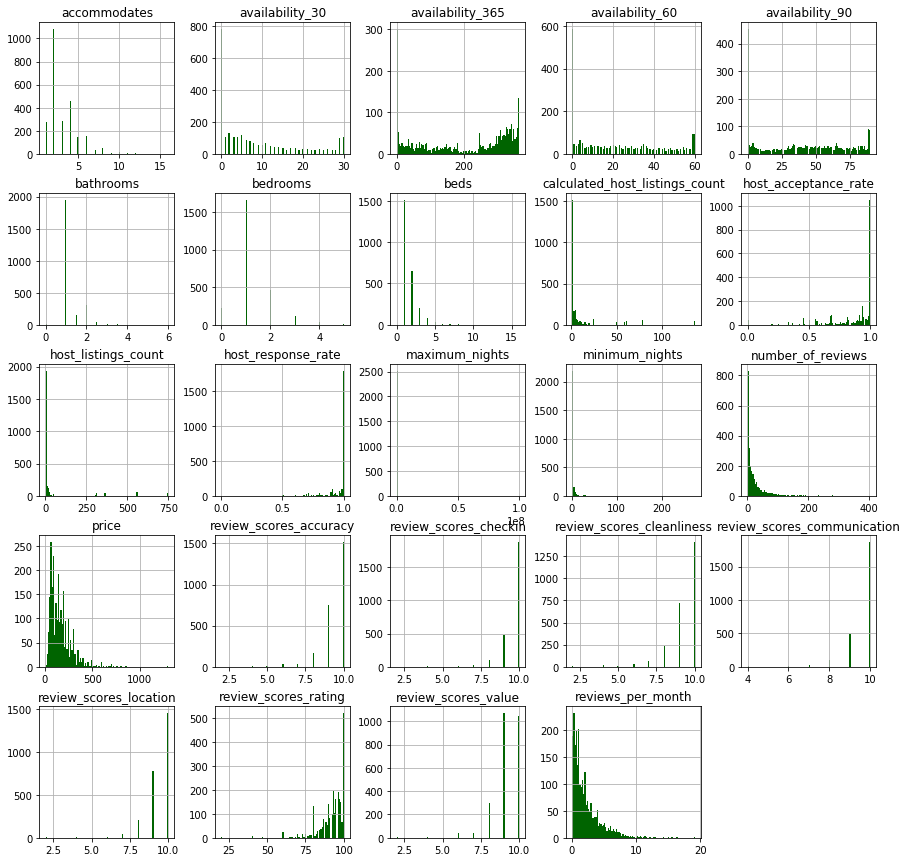

In [31]:
numeric_listings_Boston.hist(bins=100, figsize=(15, 15), color='darkgreen')
plt.savefig('features_histograms_boston.png', bbox_inches='tight')
plt.show()

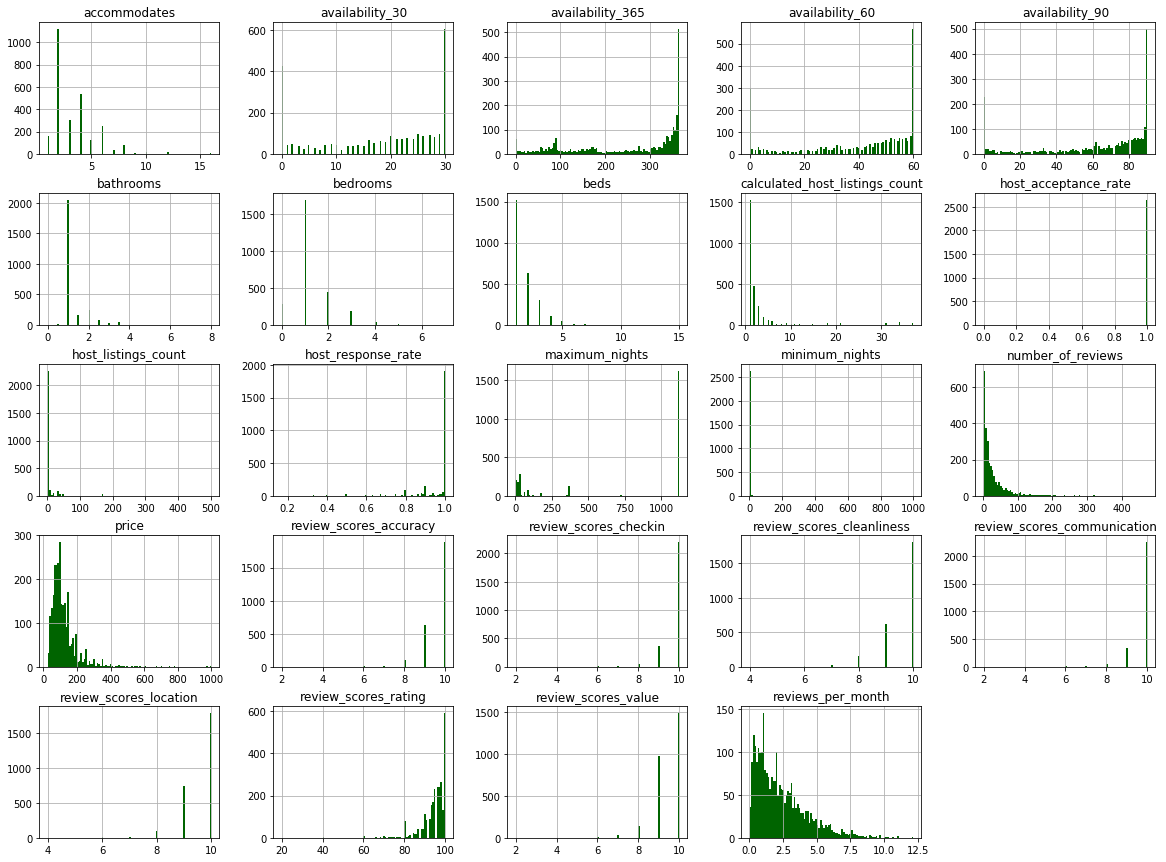

In [32]:
numeric_listings_Seattle.hist(bins=100, figsize=(20, 15), color='darkgreen')
plt.savefig('features_histograms_seattle.png', bbox_inches='tight')
plt.show()

In [33]:
listings_Boston

,id,name,summary,description,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...","Cozy, sunny, family home. Master bedroom high...",2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,False,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",True,False,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.282619,-71.133068,True,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate,False,False,1,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,2012-06-07,"Boston, Massachusetts, United States",within an hour,1.00,1.00,False,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",True,True,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.286241,-71.134374,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,True,moderate,False,False,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",2009-05-11,"Boston, Massachusetts, United States",within a few hours,1.00,0.88,True,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",True,True,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.292438,-71.135765,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,1,$20.00,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,False,moderate,True,False,1,0.47
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Come experience the comforts of home away from...,2013-04-21,"Boston, Massachusetts, United States",within a few hours,1.00,0.50,False,NaN,1,1,"['email', 'phone', 'reviews']",True,False,NaN,Roslindale,Boston,NaN,"Boston, MA",42.281106,-71.121021,False,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,2,$25.00,1,1125,a week ago,6,16,26,98,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,moderate,False,False,1,1.00
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","My comfy, clean and relaxing home is one block...",2014-05-11,"Boston, Massachusetts, United States",within an hour,1.00,1.00,True,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",True,True,Roslindale,Roslindale,Boston,2131.0,"Boston, MA",42.284512,-71.136258,True,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,1,$0.00,2,31,2 weeks ago,13,34,59,334,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,False,flexible,False,False,1,2.25
5,12386020,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Super 

In [34]:
listings_Boston = listings_Boston.dropna()
listings_Seattle = listings_Seattle.dropna()

## Three questions related to business or real-world applications

The following three questions are raised for analysis to reveal business insights. 

1. What are the price distribution for Boston and Seattle? Which city rental market is more robust?
2. How has rental demand change over the years for both cities ? Is there any underlying factor that influences them? Has the market saturated?
3. What are the features that highly correlate to price? 

In [69]:
print(numeric_listings_Boston.shape)
numeric_listings_Boston.isnull().sum()[numeric_listings_Boston.isnull().sum()>0]

(2520, 24)


Series([], dtype: int64)

## Data Visualization

### Q1 What are the price distribution for Boston and Seattle? Which city rental market is more robust?

C:\Users\jieww\Anaconda3\envs\py3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


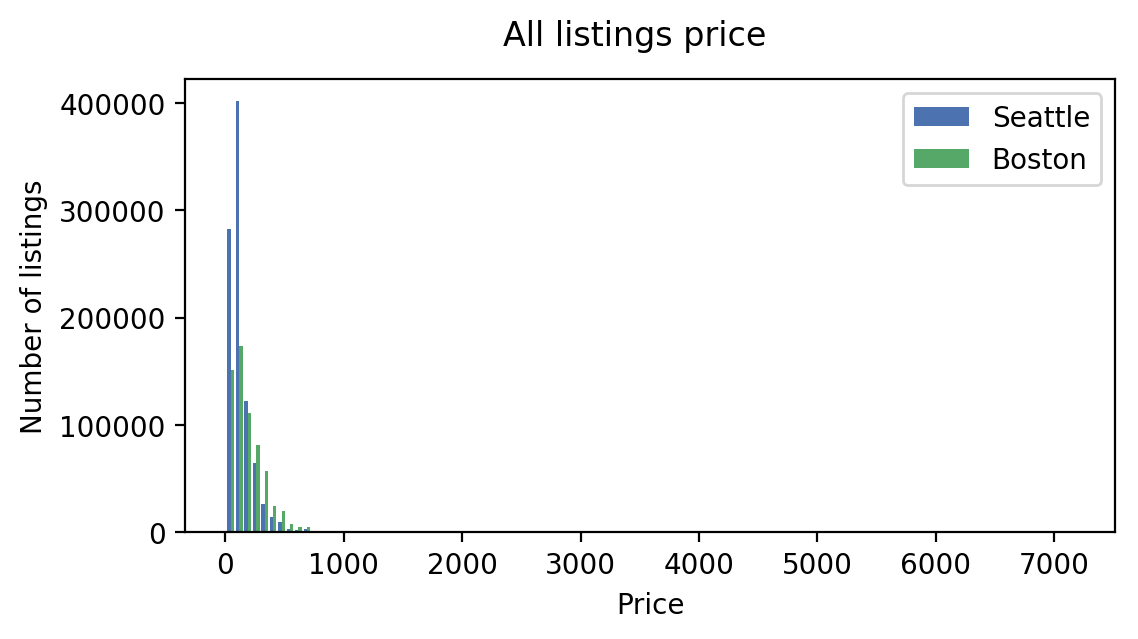

In [36]:
fig= plt.figure(figsize=(6,3),dpi=200)
plt.style.use('seaborn-deep')
plt.hist([calendar_Seattle['price'].dropna(), calendar_Boston['price'].dropna()], bins=100, label=['Seattle', 'Boston'])
plt.suptitle("All listings price");   
plt.xlabel('Price');
plt.ylabel('Number of listings');
plt.legend()
plt.show()

We can see that more of the listings' price stay within $500 with outliers on likely both dataset. That we may need to look closer to see how most of the data are distributed for each of the city.

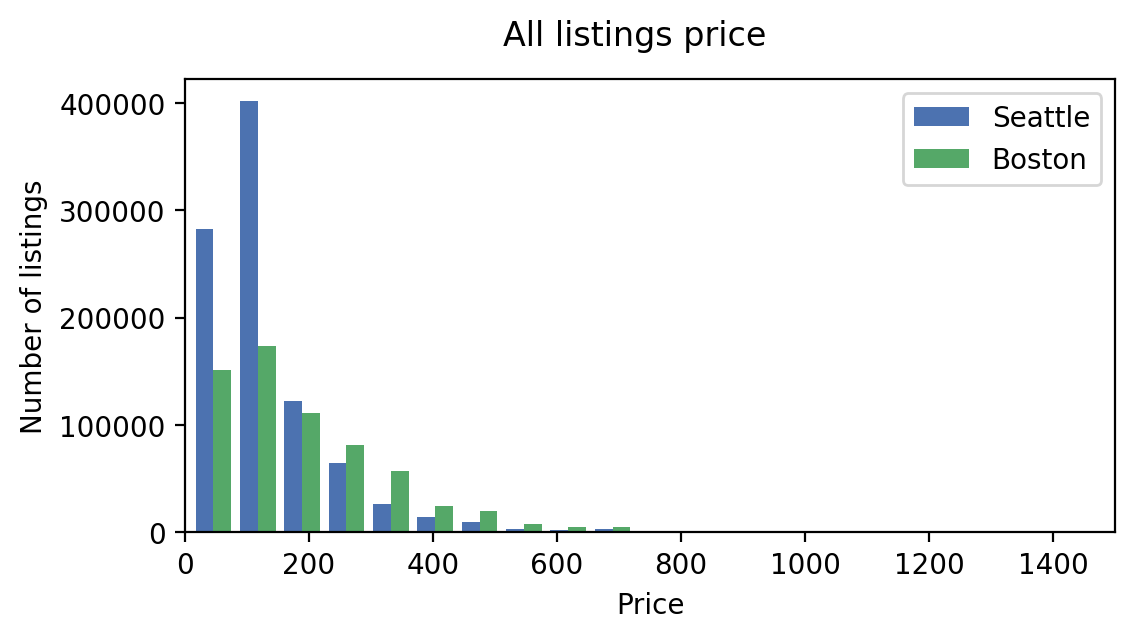

In [88]:
fig= plt.figure(figsize=(6,3),dpi=200)
plt.style.use('seaborn-deep')
plt.hist([calendar_Seattle['price'].dropna(), calendar_Boston['price'].dropna()], bins=100, label=['Seattle', 'Boston'])
plt.suptitle("All listings price");   
plt.xlim(0, 1500)
plt.xlabel('Price');
plt.ylabel('Number of listings');
plt.legend()
plt.savefig('listing_distribution.png', bbox_inches='tight')
plt.show()

From the histogram, we can see Seattle price distribution has lower kurtosis than that of Boston and outliers likely appear in both dataset. 
Since there's outlier, median instead of mean is used to get a sense of average price

In [38]:
print('The median house price in Boston is ${}'.format(int(calendar_Boston['price'].median())))
print('The median house price in Seattle is ${}'.format(int(calendar_Seattle['price'].median())))

The median house price in Boston is $150
The median house price in Seattle is $109


Let's see what the mean price is 

In [39]:
print('The mean house price in Boston is ${}'.format(int(calendar_Boston['price'].mean())))
print('The mean house price in Seattle is ${}'.format(int(calendar_Seattle['price'].mean())))

The mean house price in Boston is $198
The mean house price in Seattle is $137


Comparing both cities' mean and median price, we can say Boston rental price is generally higher than that of Seattle. Its price distribution also shows a fatter tail. Also, outliers do have an impact in the mean of both dataset. 

### Q2. How has rental demand change over the years for both cities ? Is there any underlying factor that influences them?

We are looking at causation here. 

So far we have only look at supply but not demand. It is necessay to also look at demand since both supply and demand plays a part in setting prices. Since we do not have booking data, the review data is used as proxy for demand as it tenants are asked to provide reviews within 2 weeks of after stay. 

From the review data, we can see that demand has been steadily rising over the years with Boston market experienced a steeper climb than that of Seattle. 

Sadly, we are yet to have listing data with the time span of the review data to compare supply and demand side-by-side for both cities. Nevertheless, the review data provides a sense of fulfilled demand from 2009 to 2017. 

Also there seems to be seasonality in demand every year, with peak occuring somewhere from late summer to fall. 

Nevertheless, price dynamics are nowhere near saturation in both cities.

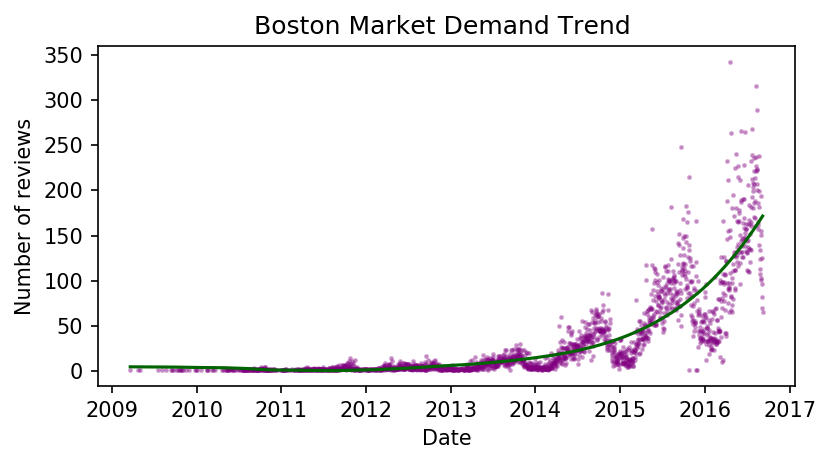

In [90]:
demand_Boston = reviews_Boston.groupby('date').count()
demand_Boston['idx'] = np.arange(len(demand_Boston))

# Fit with polyfit
coefs = polyfit(demand_Boston['idx'], demand_Boston['id'], 4)
ffit = poly.polyval(demand_Boston['idx'], coefs)
fig= plt.figure(figsize=(6,3),dpi=150)
plt.title("Boston Market Demand Trend ")
plt.style.use('seaborn-deep') 
plt.xlabel('Date');
plt.ylabel('Number of reviews');
plt.scatter(demand_Boston.index, demand_Boston['id'], marker='o', alpha=0.3, s=2, c='purple')
plt.plot(demand_Boston.index, ffit, '-', color='darkgreen')
plt.savefig('boston_demand_trend.png', bbox_inches='tight')
plt.show()

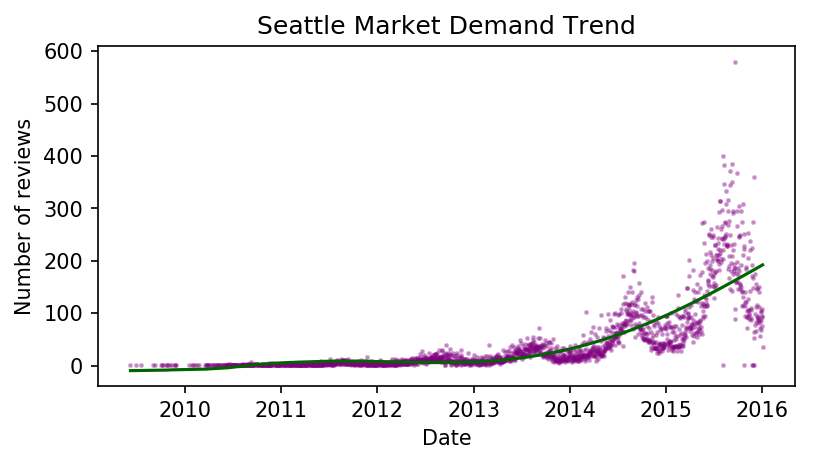

In [113]:
demand_Seattle = reviews_Seattle.groupby('date').count()
demand_Seattle['idx'] = np.arange(len(demand_Seattle))

# Fit with polyfit
coefs = polyfit(demand_Seattle['idx'], demand_Seattle['id'], 4)
ffit = poly.polyval(demand_Seattle['idx'], coefs)
fig= plt.figure(figsize=(6,3),dpi=150)
plt.title("Seattle Market Demand Trend")
plt.style.use('seaborn-deep') 
plt.xlabel('Date');
plt.ylabel('Number of reviews');
plt.scatter(demand_Seattle.index, demand_Seattle['id'], marker='o', alpha=0.3, s=2, c='purple')
plt.plot(demand_Seattle.index, ffit, '-', color='darkgreen')
plt.savefig('seattle_demand_trend.png', bbox_inches='tight')
plt.show()

#### Let's look at the picture provided by price. 

To get this we need to create new columns by extracting day of the year from the dataset. With this day of the year column, we can get the average price for the day and observe the daily trend. 

In [93]:
calendar_Seattle['day_of_year'] = calendar_Seattle.index.map(lambda x: x.timetuple().tm_yday)
calendar_Boston['day_of_year'] = calendar_Boston.index.map(lambda x: x.timetuple().tm_yday)

In [94]:
avg_dayprice_Seattle = calendar_Seattle.drop(['listing_id','day_of_year'],axis=1).groupby('date').mean()
avg_dayprice_Boston = calendar_Boston.drop(['listing_id','day_of_year'],axis=1).groupby('date').mean()

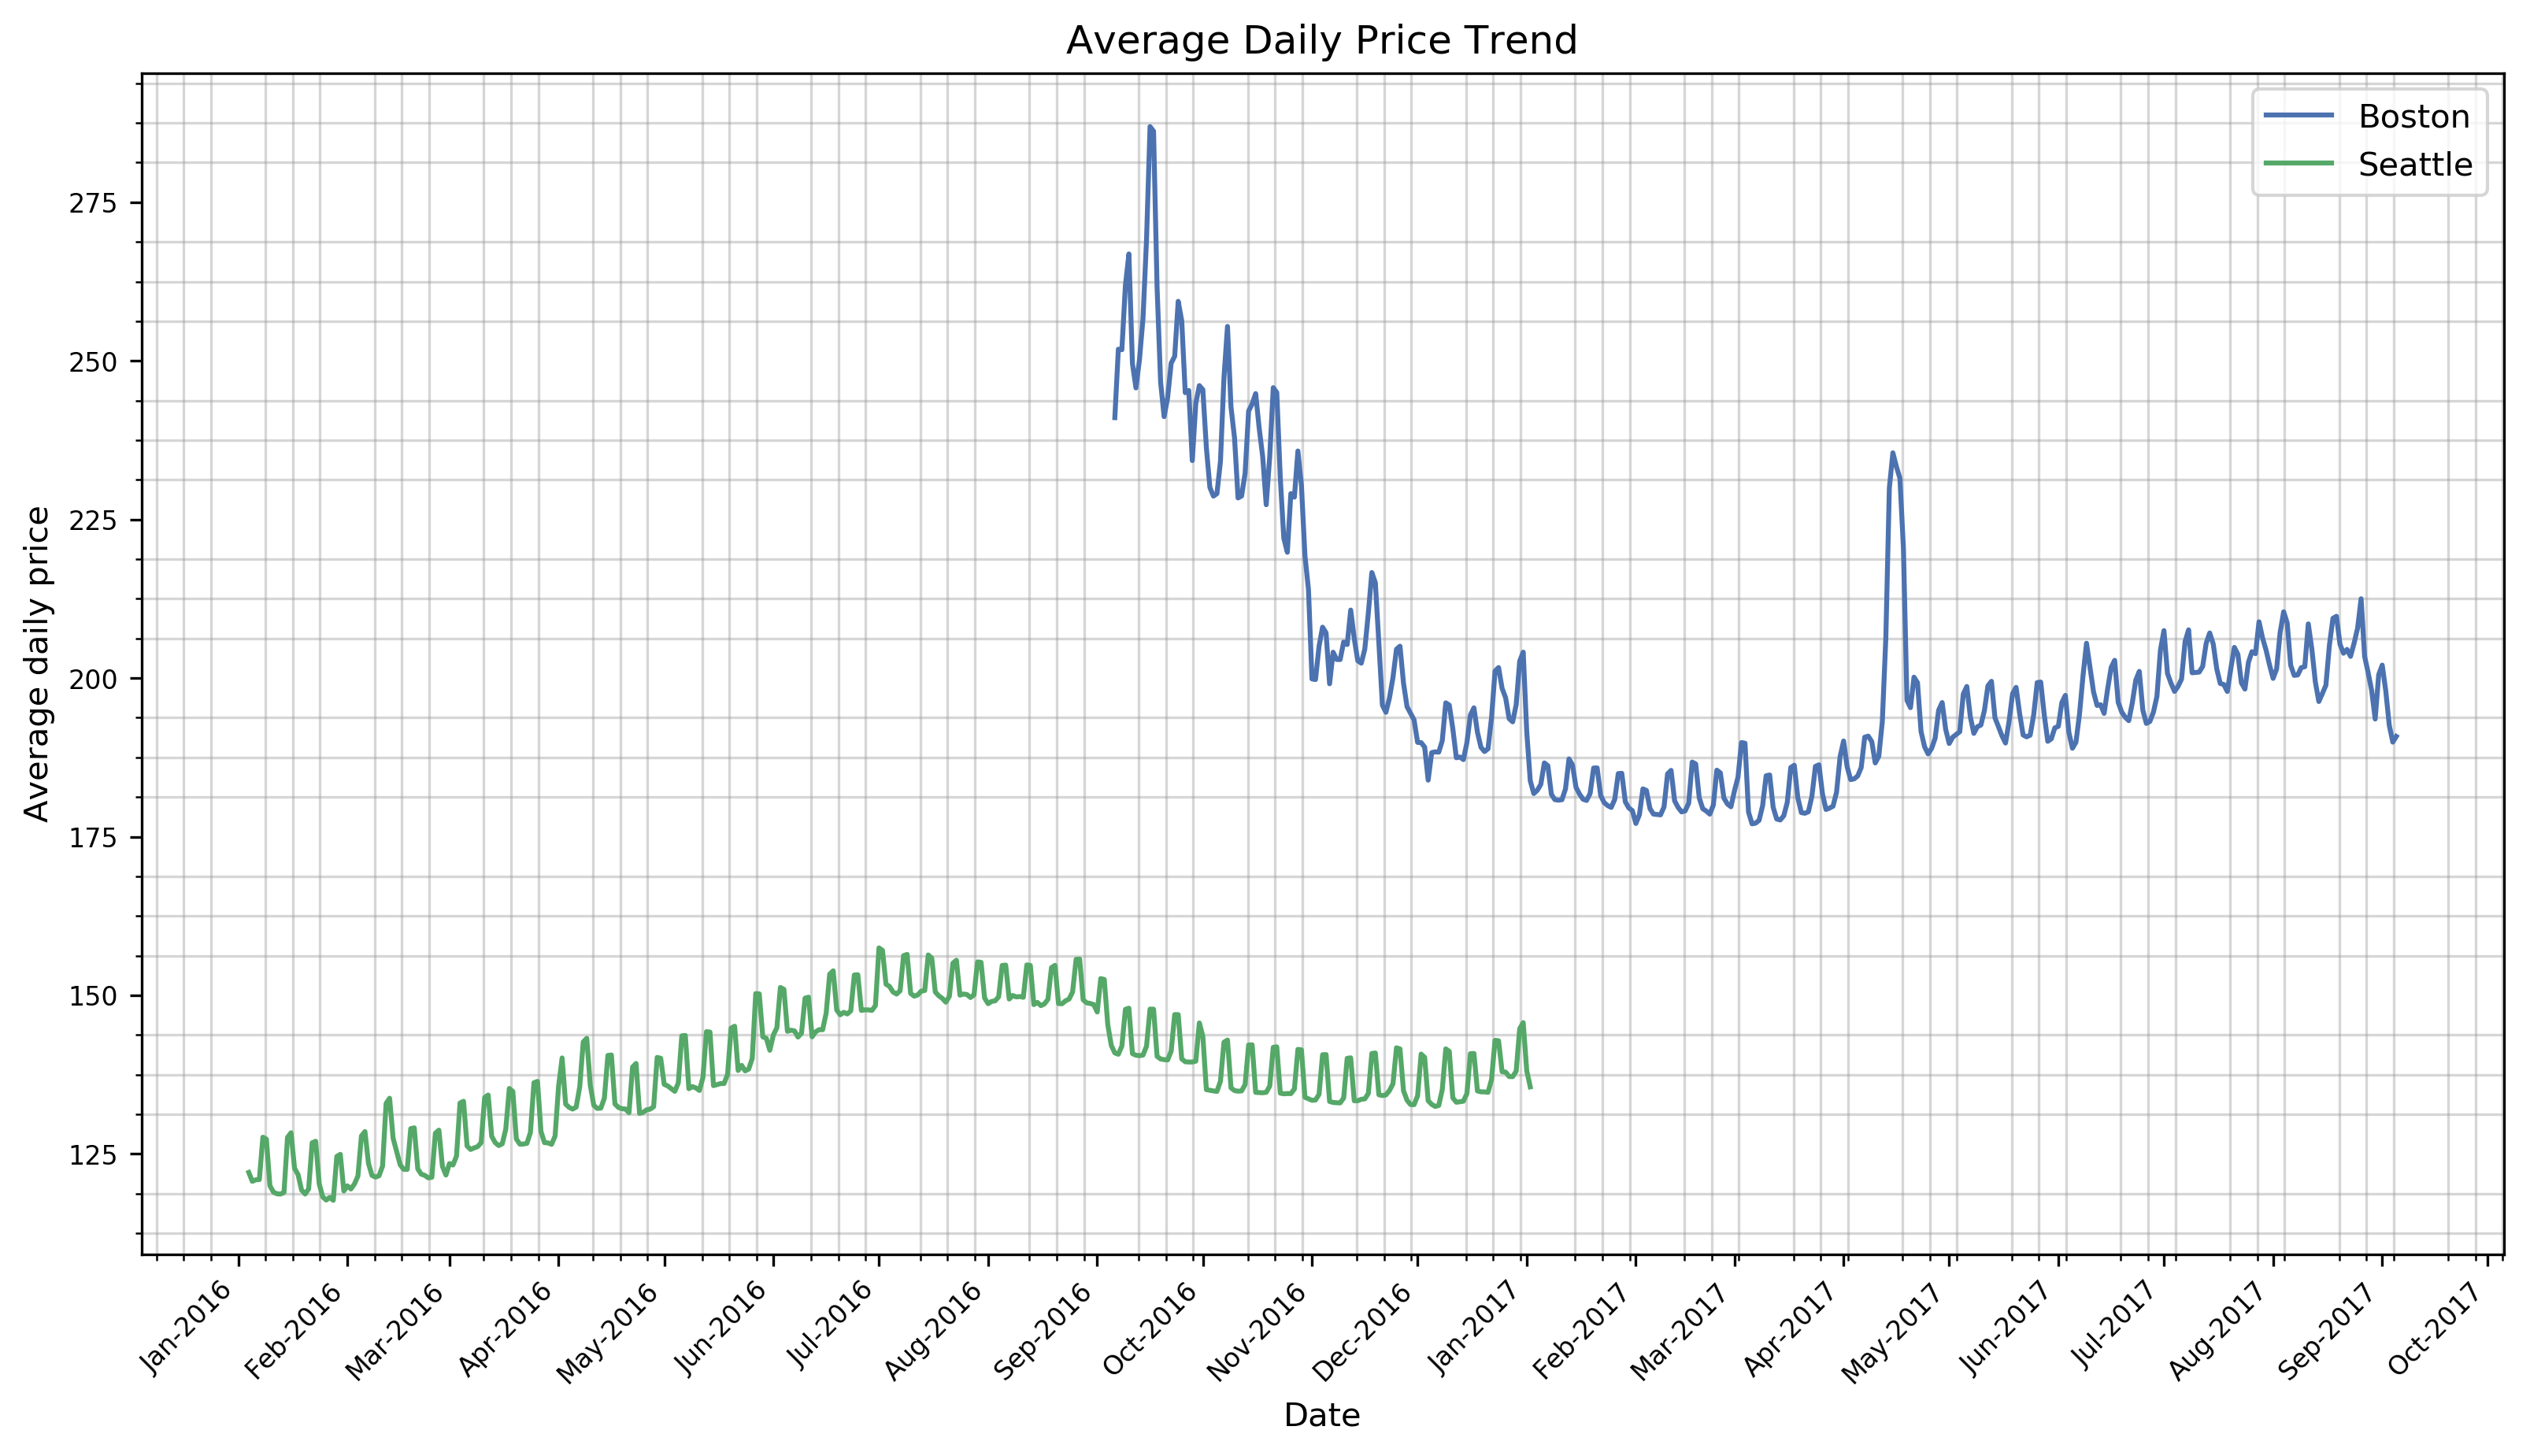

In [95]:
import matplotlib.dates as mdates
from matplotlib.dates import SA

months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator(byweekday=SA)   # every Sunday
months_fmt = mdates.DateFormatter('%b-%Y')
#weeks_fmt = mdates.DateFormatter('%A')

fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(weeks)
#ax.xaxis.set_minor_formatter(weeks_fmt)

ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=6)

ax.plot(avg_dayprice_Boston['price'], label='Boston')
ax.plot(avg_dayprice_Seattle['price'], label='Seattle')
ax.legend()
ax.xaxis_date()
ax.set_xlabel('Date')
ax.set_ylabel('Average daily price');
ax.autoscale_view()
ax.set_title("Average Daily Price Trend")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.4)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('avg_daily_price_trend.png', bbox_inches='tight')
plt.show()

The major axis in this graph is month whereas minor axis is week. The grid on the graph is plotted on minor axis, which is on weekly interval.  
From the graph, we can observe the consistent mini spikes everyweek. Since the gridlines are plotted on every Saturday, 
we can conclude that mini spikes are on the weekends. 

Boston's accomodation rentals are more volatile than that of Seattle. The major spikes and moves in Boston are likely attributed to the more eventful city. The Spike in April 2017 as seen from the plot is likely caused by Boston marathon event. 
With only a year of data, we can only observe that Boston Airbnb hosts seem to get busier towards fall: September, October and November are the times when Boston welcomes visitors. As for Seattle, higher price are seen from late summer to fall. 

This finding in pricing trend seems to agrees to the bigger picture reveal in the seasonality observed in demand trend above for which demands tend to peak in the period from late summer to fall. 

### What are the factors that correlates with price?

In [43]:
def scatter_matrix(numeric_listings):
    # Clear screen from previous plot
    plt.close('all')

    # Set plot canvas and its size
    fig1 = plt.figure(figsize=(15, 140))

    # Set the 2 x 2 grid in order to show 4 scatter plots subplots for side-by-side comparison
    outer = gridspec.GridSpec(18, 2, wspace=0.2, hspace=0.2)

    # Plot index by index
    for i, f in enumerate(numeric_listings):

        # Set the internal grid within each subplot, the selected index histogram on top
        # the compared index histogram on the right and the scatter plot enclosed by both histograms
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 width_ratios=[4, 1], height_ratios=[1, 4],
                                                 subplot_spec=outer[i], wspace=0.1, hspace=0.1)

        # Iterate through the subplot within subplot.
        for j in range(4):
            ax = plt.Subplot(fig1, inner[j])

            # last ten years monthly return for selected index
            x = numeric_listings['price']

            # last ten years monthly return for compared index
            y = numeric_listings[f]

            # An overall correlation coefficient of ten year monthly return
            cc = round(np.corrcoef(x, y)[0][1], 3)

            # Plot scatter plot of both indices at bottom left
            if j == 2:
                ax.scatter(x, y, color='r', s=20, marker='s', alpha=.4)
                if i > 1:
                    ax.set_xlabel("Price", fontsize=10)
                ax.set_ylabel(f, fontsize=10)

            # Plot compared index histogram at bottom right
            elif j == 3:
                ax.hist(y, bins=50, orientation='horizontal')
                plt.setp(ax.get_yticklabels(), visible=False)

            # Plot selected index histogram at top left
            elif j == 0:
                ax.hist(x, bins=50)
                ax.set_title('Correlation coef. of  %s with %s: %s ' % (
                    "Price", f, cc), size=12, color='g')
                plt.setp(ax.get_xticklabels(), visible=False)

            # Void the top right subplot
            elif j == 1:
                ax.axis('off')

            fig1.add_subplot(ax)

    # Display and save the graph
    plt.savefig('price_scatter.pdf')

    # Inform user graph is saved
    print(
        "Plot saved as price_scatter.pdf. Please close this plot, Correlation trend will be plotted next. Thank You!")
    plt.show()

### Boston listing

The scatterplots and correlation matrix shows that the number of people the property can accommodate, number of beds and bedrooms seems to correlate with rental price, which make perfect sense and doesn't help reveal much insight here. 
We need to look at neighbourhood and property to see if it shed any light on price correlation. 

Plot saved as price_scatter.pdf. Please close this plot, Correlation trend will be plotted next. Thank You!


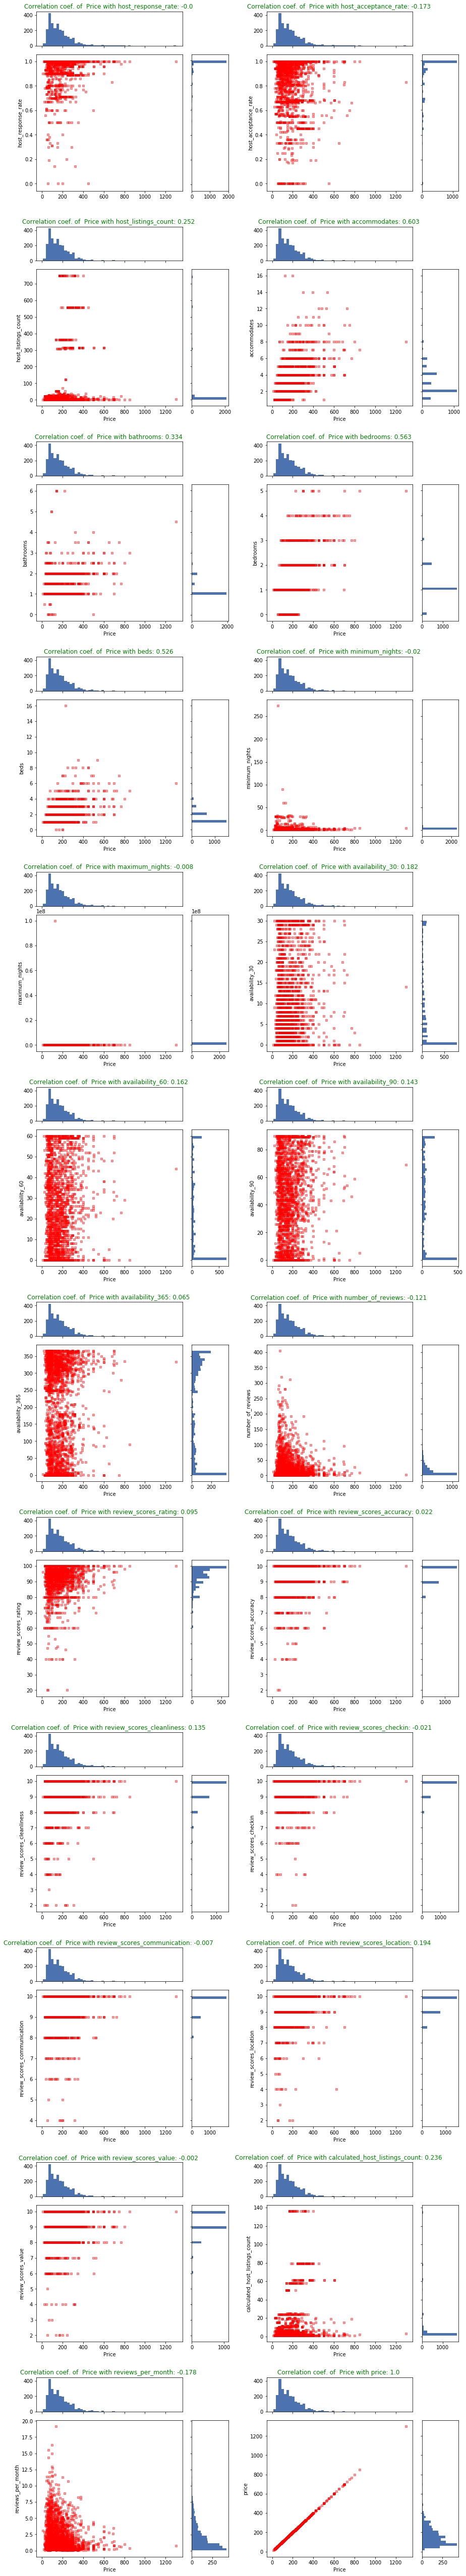

In [44]:
scatter_matrix(numeric_listings_Boston)

### Seattle Listing

Plot saved as price_scatter.pdf. Please close this plot, Correlation trend will be plotted next. Thank You!


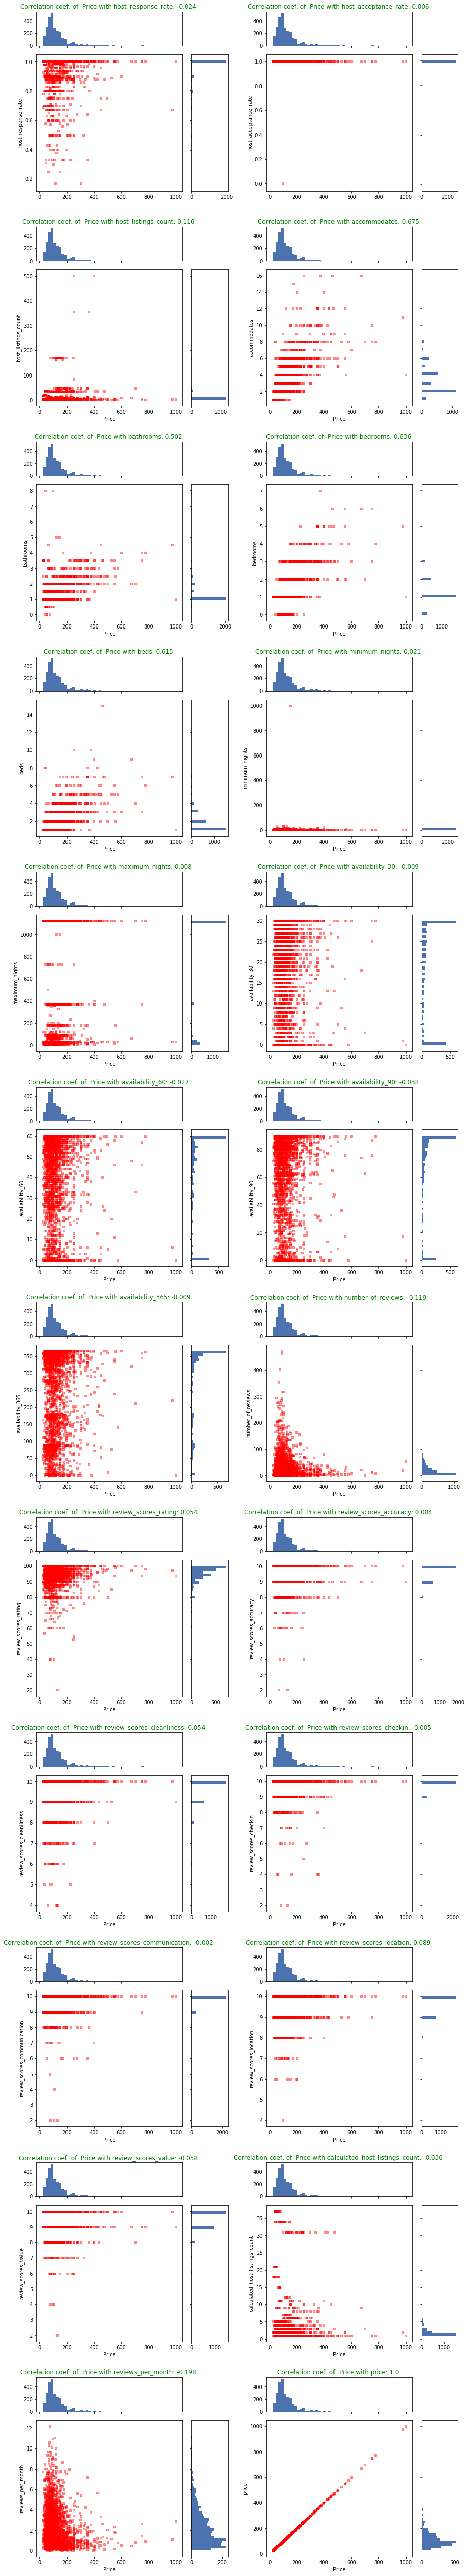

In [45]:
scatter_matrix(numeric_listings_Seattle)

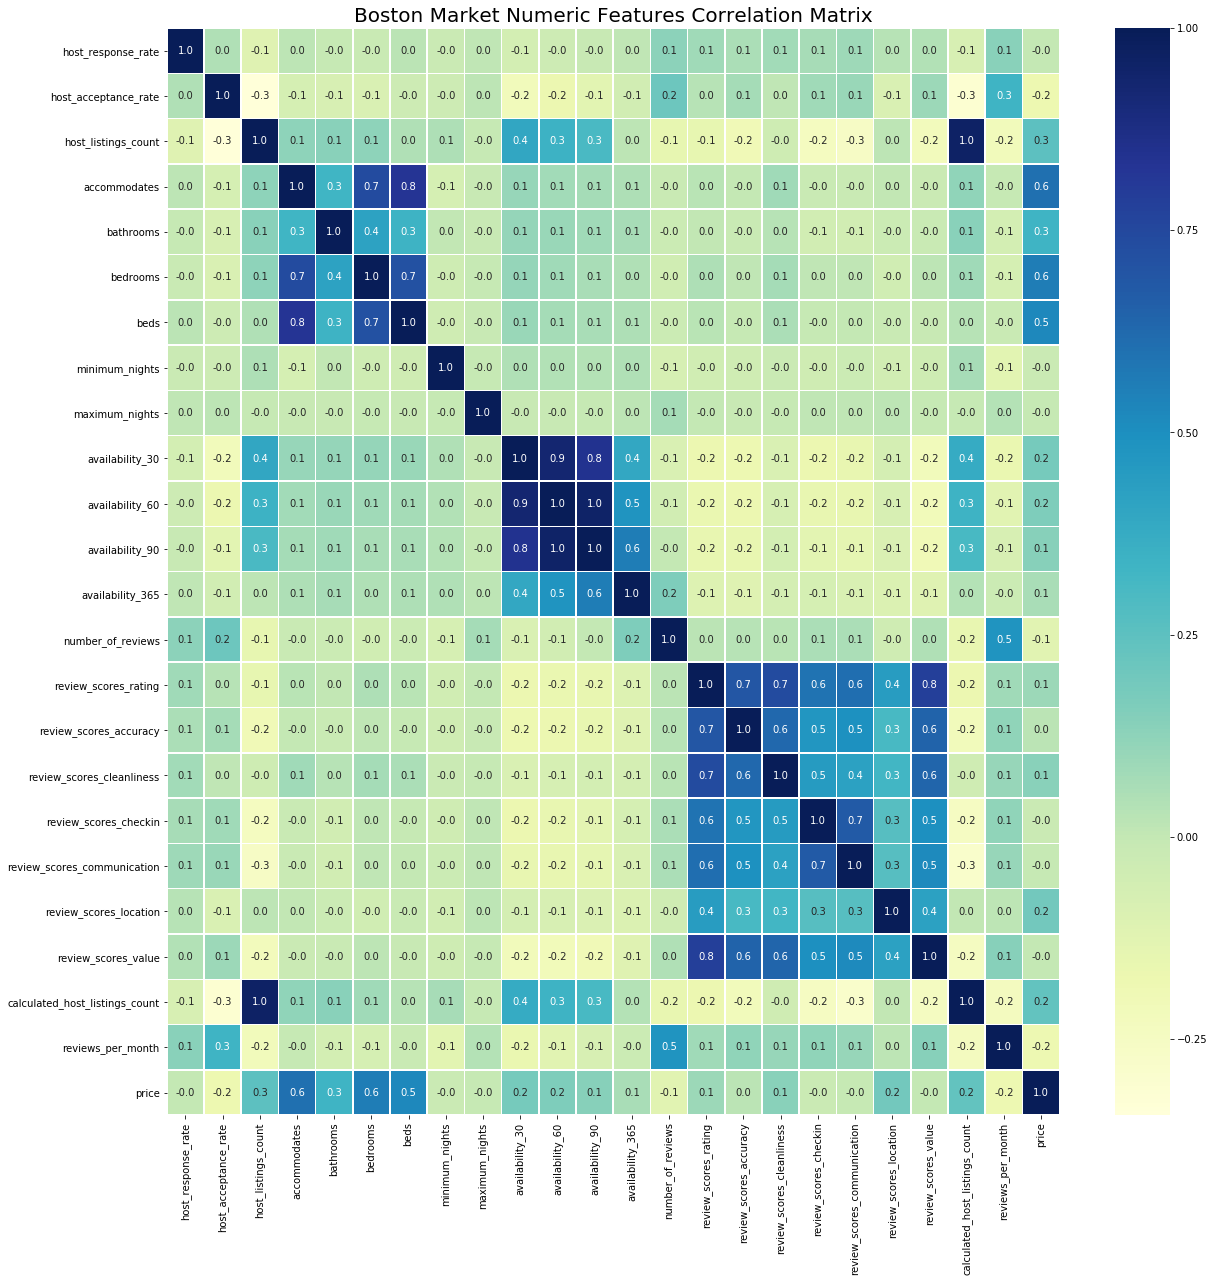

In [104]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_listings_Boston.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.title("Boston Market Numeric Features Correlation Matrix", size=20)
plt.savefig('boston_corr_matrix.png', bbox_inches='tight')
plt.show()

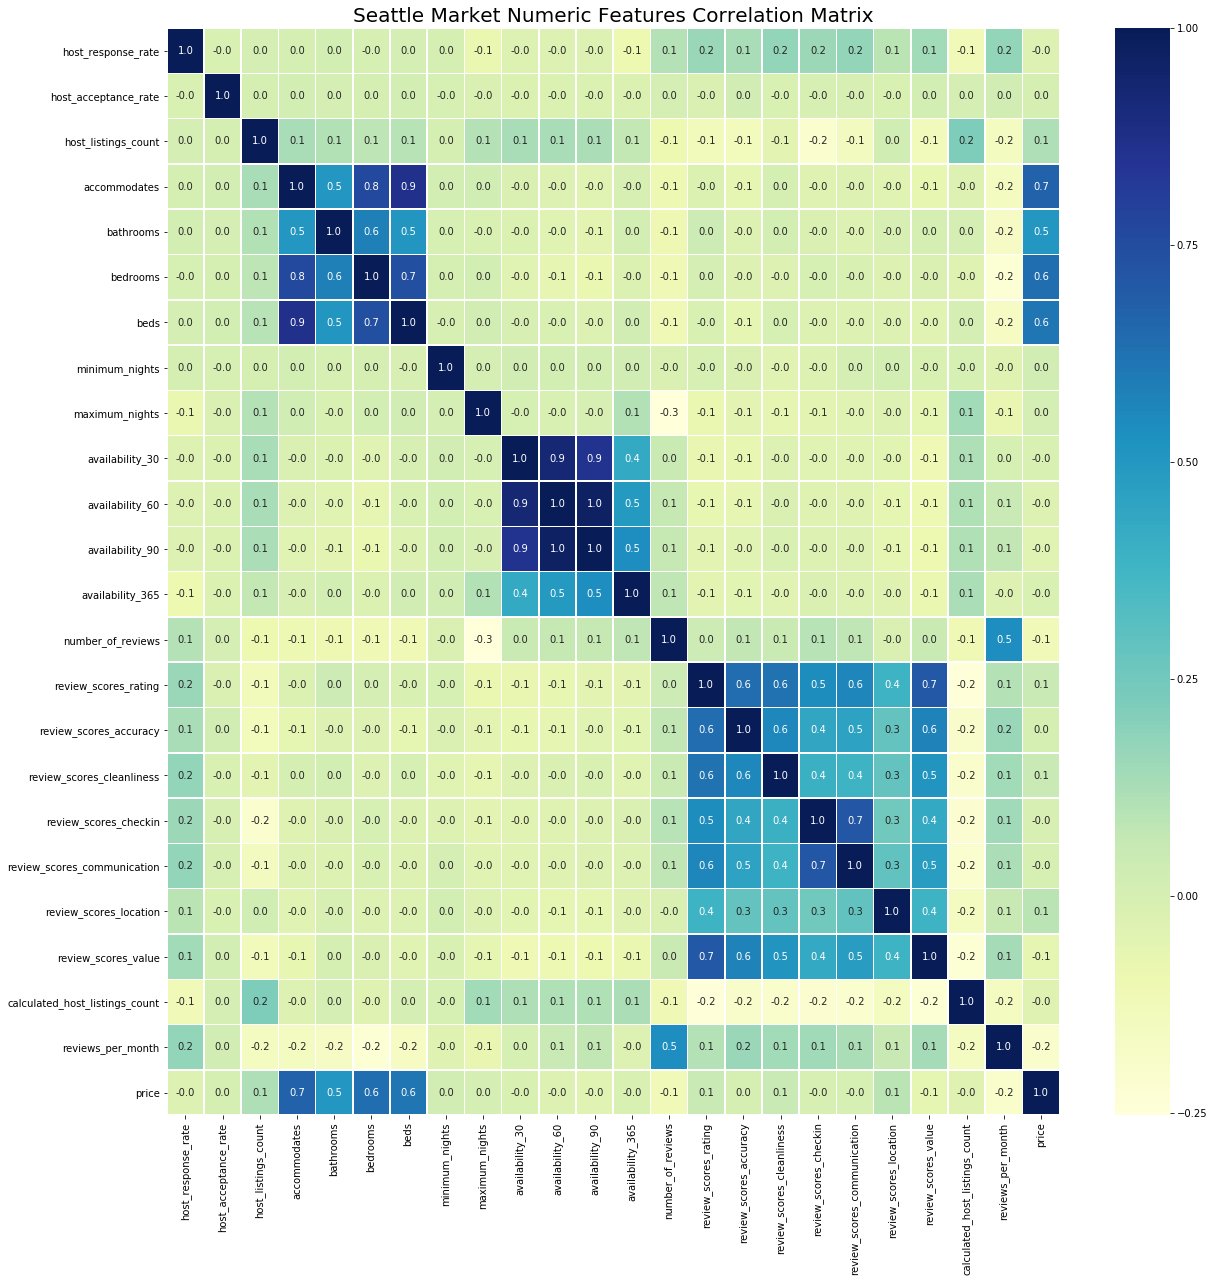

In [105]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_listings_Seattle.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.title("Seattle Market Numeric Features Correlation Matrix", size=20)
plt.savefig('seattle_corr_matrix.png', bbox_inches='tight')
plt.show()

#### Boston rental market

For Boston market, we can see that, apartment, condominium and house are the most popular offering here in most neighbourhoods. Some of the property types that fetch higher rental income are house, townhouse and condominium, likely due to limited offerings looking at the Listing count bar chart. 
According to Figure 7, Downtown, Leather District and South Boston Waterfront generally fetch higher rents than other neighbourhoods. Back Bay, Dorchester, Fen Way, Jamaica Plain and South End are the neighbourhoods with plenty of supplies, these should be the neighbourhood with more competitive marketplace as such below average rental price. Looking at this perspective, Bay Village, South Boston Waterfront and West End are the much less competitive marketplace on the supply side with good demand from the tenants as reflected in their willingness to pay higher price.

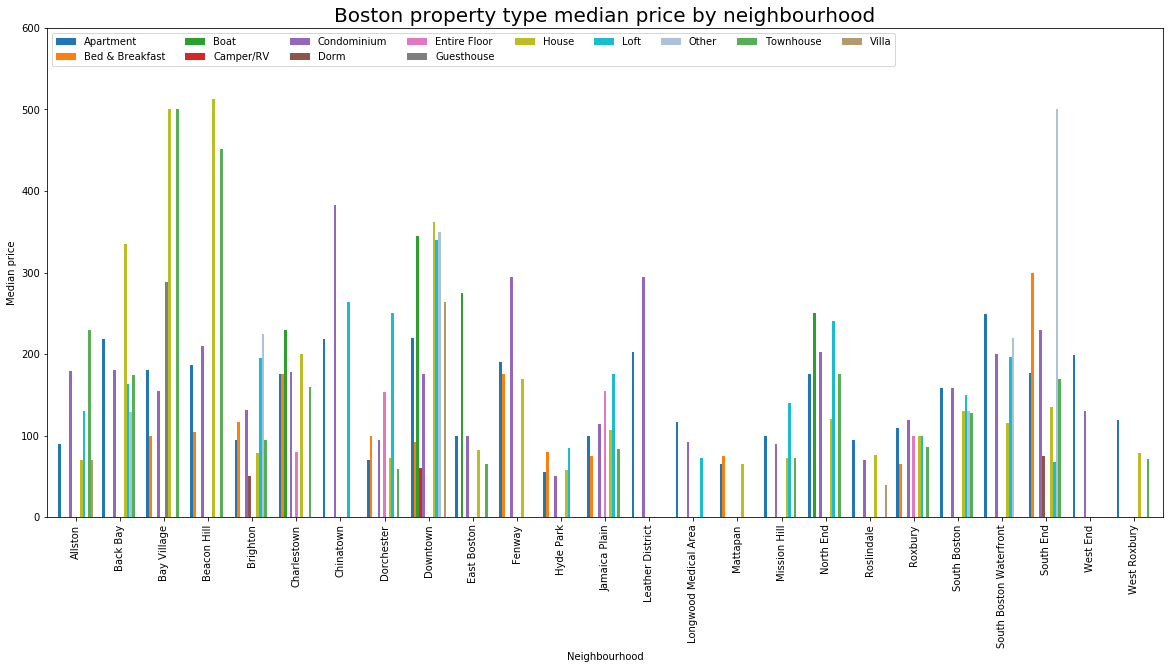

In [150]:
colors = dict(mcolors.TABLEAU_COLORS, **mcolors.XKCD_COLORS)
boston_proptype = listings_Boston.groupby(['neighbourhood_cleansed', 'property_type'])
boston_proptype.median()["price"].unstack().plot(kind='bar', stacked=False, figsize=(20,9), color=colors, width=0.8)
plt.title("Boston property type median price by neighbourhood", size=20)
plt.legend(loc="upper left",ncol=9)
plt.ylim(0, 600)
plt.xlabel('Neighbourhood')
plt.ylabel('Median price');
plt.savefig('boston_neighbourhood_price.png', bbox_inches='tight')
plt.show()

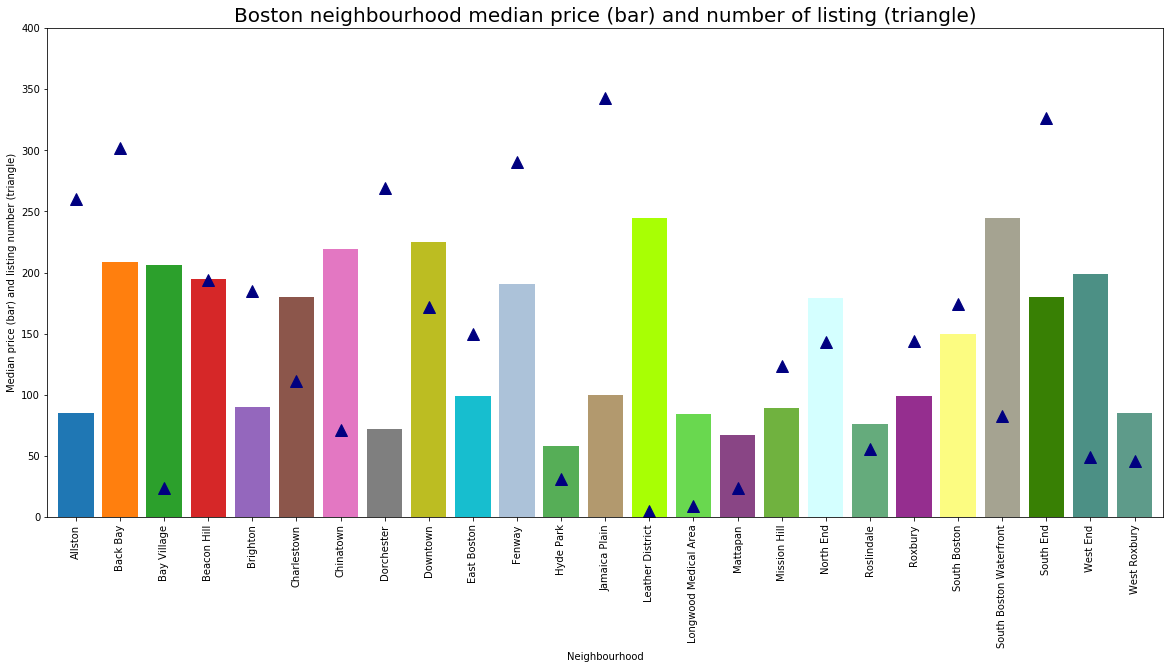

In [152]:
boston_proptype = listings_Boston.groupby(['neighbourhood_cleansed'])
boston_proptype.count()["id"].plot(style='^', markersize=12, color='navy', marker='^')
boston_proptype.median()["price"].plot(kind='bar', stacked=False, figsize=(20,9), color=colors, width=0.8)
plt.title("Boston neighbourhood median price (bar) and number of listing (triangle)", size=20)
#plt.legend(loc="upper left",ncol=9)
plt.ylim(0, 400)
plt.xlabel('Neighbourhood')
plt.ylabel('Median price (bar) and listing number (triangle)');
plt.savefig('boston_neighbourhood_price_count.png', bbox_inches='tight')
plt.show()

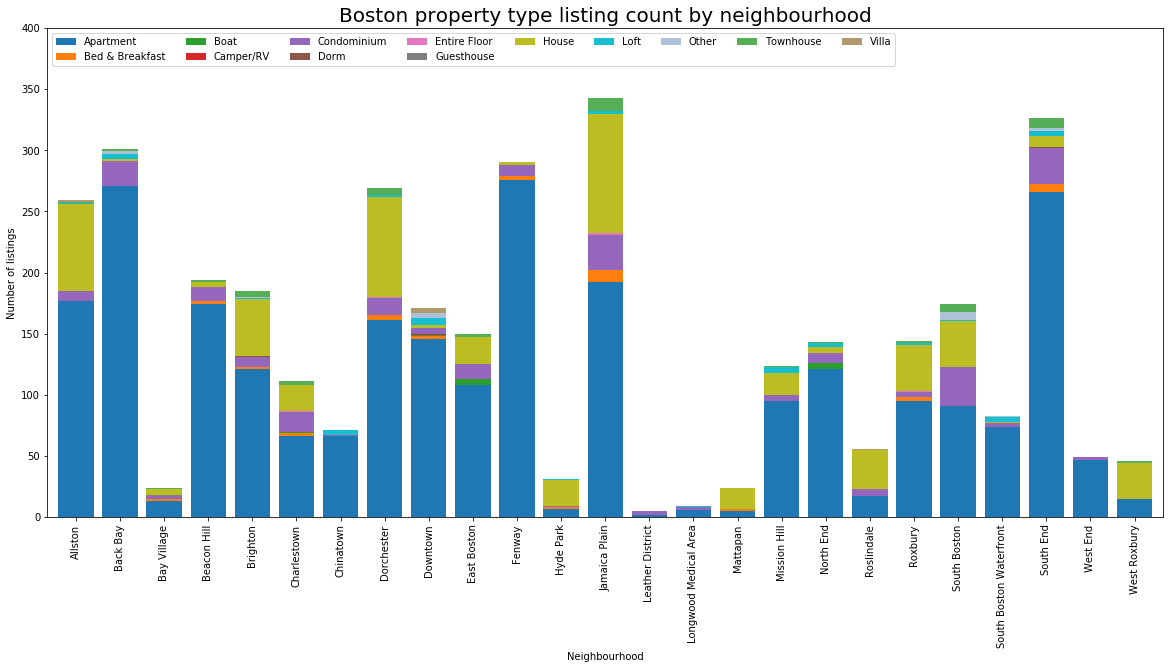

In [107]:
colors = dict(mcolors.TABLEAU_COLORS, **mcolors.XKCD_COLORS)
boston_proptype = listings_Boston.groupby(['neighbourhood_cleansed', 'property_type'])
boston_proptype.count()["id"].unstack().plot(kind='bar', stacked=True, figsize=(20,9), color=colors, width=0.8)
plt.title("Boston property type listing count by neighbourhood", size=20)
plt.legend(loc="upper left",ncol=9)
plt.ylim(0, 400)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings');
plt.savefig('boston_neighbourhood_count.png', bbox_inches='tight')
plt.show()

#### Seattle housing market

Condominium, house and apartment are the popular accommodation offering in Seattle. Most neighbourhoods rentals are quite consistent in staying within a range with the exception of Wallingford, which could be an outlier. The property type that fetches the high price is boat, an exotic property. Belltown, Fremont Minor and Wallingford rental properties are more competitively price with plenty of supplies. Briarcliff, Industrial District, Pioneer Square and Southeast Magnolia are neighbourhood with much lesser supplies and as such fetching higher rental price. If the cost of buying the property is comparative to other neighbourhood, these area could be worth investing.

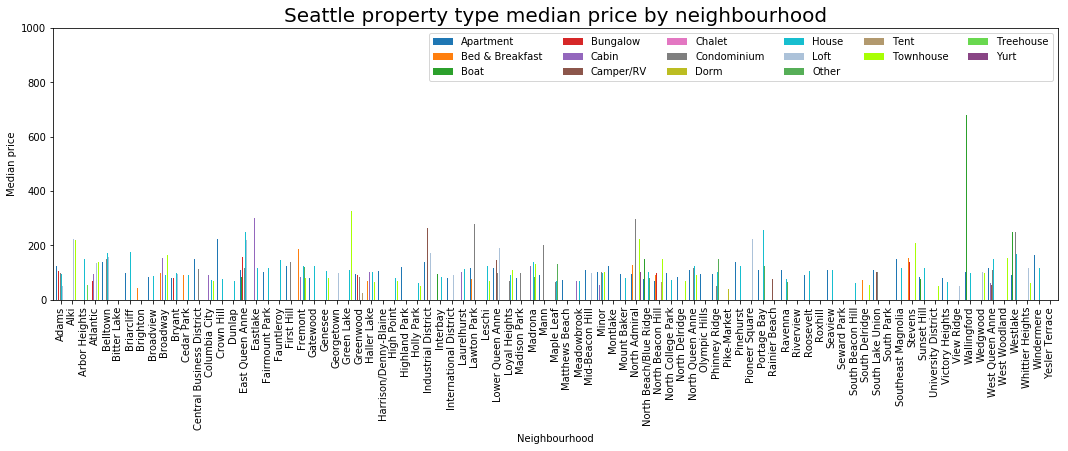

In [119]:
colors = dict(mcolors.TABLEAU_COLORS, **mcolors.XKCD_COLORS)
seattle_proptype = listings_Seattle.groupby(['neighbourhood_cleansed', 'property_type'])
seattle_proptype.median()["price"].unstack().plot(kind='bar', stacked=False, figsize=(18,5), color=colors, width=0.8)
plt.title("Seattle property type median price by neighbourhood", size=20)
plt.legend(loc="upper right",ncol=6)
plt.xlabel('Neighbourhood')
plt.ylim(0, 1000)
plt.ylabel('Median price');
plt.savefig('seattle_neighbourhood_price.png', bbox_inches='tight')
plt.show()

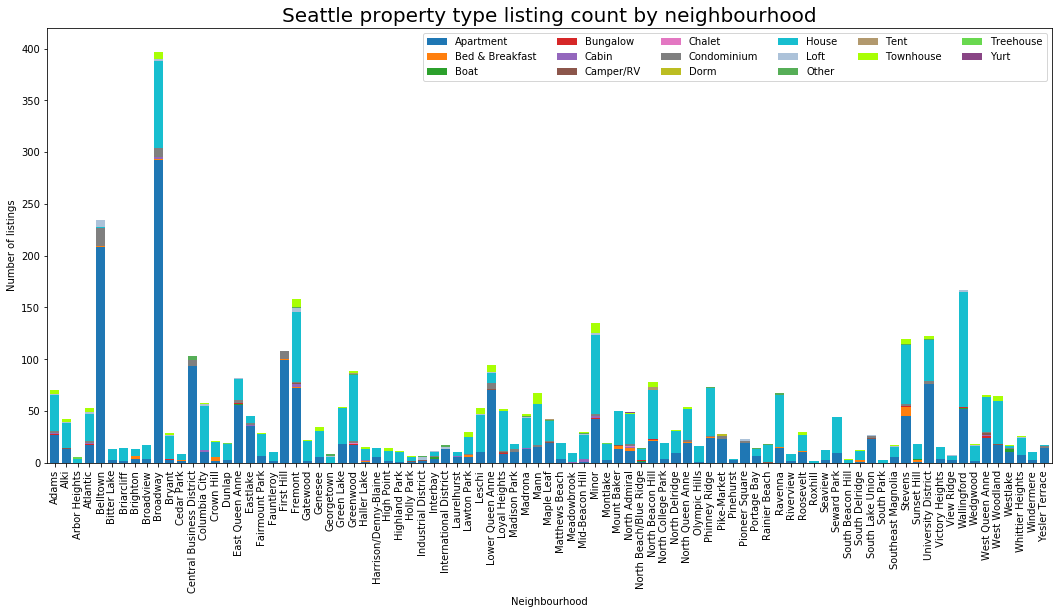

In [109]:
seattle_proptype = listings_Seattle.groupby(['neighbourhood_cleansed', 'property_type'])
seattle_proptype.count()["id"].unstack().plot(kind='bar', stacked=True, figsize=(18,8), color=colors, width=0.8)
plt.title("Seattle property type listing count by neighbourhood", size=20)
plt.legend(loc="upper right",ncol=6)
plt.ylim(0, 420)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.savefig('seattle_neighbourhood_count.png', bbox_inches='tight')
plt.show()

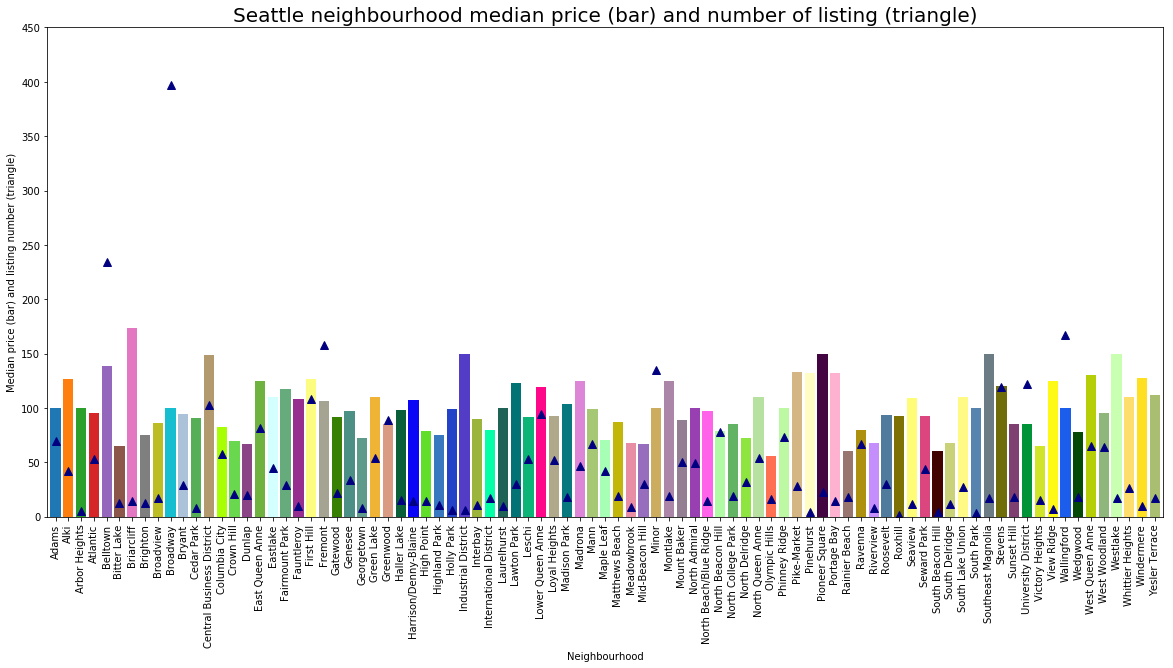

In [151]:
seattle_proptype = listings_Seattle.groupby(['neighbourhood_cleansed'])
seattle_proptype.count()["id"].plot(style='^', markersize=8, color='navy', marker='^')
seattle_proptype.median()["price"].plot(kind='bar', stacked=False, figsize=(20,9), color=colors, width=0.8)
plt.title("Seattle neighbourhood median price (bar) and number of listing (triangle)", size=20)
plt.ylim(0, 450)
plt.xlabel('Neighbourhood')
plt.ylabel('Median price (bar) and listing number (triangle)');
plt.savefig('seattle_neighbourhood_price_count.png', bbox_inches='tight')
plt.show()

In short, location plays an important part in price settings, along with seasonality.

## Conclusion
In conclusion, as Airbnb grows and expands its marketplace to more cities, the city-based dataset are becoming very handy in analysing real estate marketplace. However due to they only form part of the picture. Coupling the dataset with other real estate marketplace such as Trulia, Zillow as well as travellers and transportation data, it is possible to create application to facilitate real-estate investment analysis.